<a href="https://colab.research.google.com/github/yukitiec/Research/blob/main/YOLO_ClassifyData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [ ]:
import cv2 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow
import scipy.ndimage as ndimage

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Offline Detection From YOLOv7

In [ ]:
import pandas as pd
file = pd.read_csv(filepath_or_buffer = '/content/gdrive/My Drive/YAMAKAWA_LAB/3D_Reconstruction/20230425/Tracking/tracking_right.csv')#'/content/gdrive/My Drive/YAMAKAWA_LAB/YOLO_labelimg/Images/13_files/gray/gray.csv')
value =file.values
print(value[1])

[  1.         184.         133.         197.         148.
   0.43383789   1.        ]


In [ ]:
def classify_data(value):
  """classify data into ball, hand, elbow, body
  """

  #initialization
  limit = value.shape[0]-1

  #nd.array -> list
  value = value.tolist()

  # class : {0:"Ball",1:"Hand",2:"Elbow",3:"Body"}
  frame_0 = []
  frame_1 = []
  frame_2 = []
  frame_3 = []
  Ball = []
  Hand = []
  Elbow = []
  Body = []

  time_step = 1
  i = 0

  while i < limit: #total detection over a sequences

    #For confirming if object is detected or not in the time_step
    count_0 = 0
    count_1 = 0
    count_2 = 0
    count_3 = 0

    #check the progress state
    print((time_step,i))

    while value[i][0] == time_step and i <  limit:
      x = (value[i][1]+value[i][3])/2
      y = (value[i][2]+value[i][4])/2
      w = value[i][3]-value[i][1]
      h = value[i][4]-value[i][2]

      if int(value[i][-1]) == 0: #Ball 
        frame_0.append(time_step)
        temp = [x,y,w,h]
        Ball.append(temp)
        count_0 += 1

      elif int(value[i][-1]) == 1: #Hand
        frame_1.append(time_step)
        temp = [x,y,w,h]
        Hand.append(temp)
        count_1 += 1

      elif int(value[i][-1]) == 2: #Elbow
        frame_2.append(time_step)
        temp = [x,y,w,h]
        Elbow.append(temp)
        count_2 += 1

      elif int(value[i][-1]) == 3: #Body
        frame_3.append(time_step)
        temp = [x,y,w,h]
        Body.append(temp)
        count_3 += 1
    
      #next detection
      i += 1

    #If not detected
    if count_0 == 0:
      frame_0.append(time_step)
      temp = [None,None,None,None]
      Ball.append(temp)
    
    if count_1 == 0:
      frame_1.append(time_step)
      temp = [None,None,None,None]
      Hand.append(temp)
    
    if count_2 == 0:
      frame_2.append(time_step)
      temp = [None,None,None,None]
      Elbow.append(temp)
    
    if count_3 == 0:
      frame_3.append(time_step)
      temp = [None,None,None,None]
      Body.append(temp)

    #next time-step
    time_step += 1
  
  frame_0 = np.asarray(frame_0)
  frame_1 = np.asarray(frame_1)   
  frame_2 = np.asarray(frame_2)
  frame_3 = np.asarray(frame_3)
  Ball = np.asarray(Ball)
  Hand = np.asarray(Hand)
  Elbow = np.asarray(Elbow)
  Body = np.asarray(Body)

  return frame_0,frame_1,frame_2,frame_3,Ball,Hand,Elbow,Body

In [ ]:
frame_0,frame_1,frame_2,frame_3,Ball,Hand,Elbow,Body = classify_data(value)

(1, 0)
(2, 3)
(3, 6)
(4, 9)
(5, 11)
(6, 14)
(7, 17)
(8, 21)
(9, 24)
(10, 27)
(11, 29)
(12, 32)
(13, 34)
(14, 37)
(15, 40)
(16, 42)
(17, 46)
(18, 49)
(19, 53)
(20, 57)
(21, 62)
(22, 65)
(23, 67)
(24, 71)
(25, 75)
(26, 79)
(27, 82)
(28, 86)
(29, 89)
(30, 92)
(31, 95)
(32, 98)
(33, 102)
(34, 107)
(35, 111)
(36, 115)
(37, 118)
(38, 121)
(39, 124)
(40, 128)
(41, 131)
(42, 134)
(43, 138)
(44, 141)
(45, 145)
(46, 149)
(47, 153)
(48, 157)
(49, 161)
(50, 165)
(51, 169)
(52, 173)
(53, 177)
(54, 180)
(55, 183)
(56, 186)
(57, 189)
(58, 192)
(59, 195)
(60, 198)
(61, 201)
(62, 204)
(63, 207)
(64, 210)
(65, 213)
(66, 216)
(67, 219)
(68, 222)
(69, 225)
(70, 228)
(71, 231)
(72, 234)
(73, 237)
(74, 240)
(75, 243)
(76, 247)
(77, 253)
(78, 258)
(79, 263)
(80, 266)
(81, 271)
(82, 275)
(83, 280)
(84, 285)
(85, 290)
(86, 295)
(87, 300)
(88, 305)
(89, 310)
(90, 315)
(91, 319)
(92, 323)
(93, 326)
(94, 330)
(95, 335)
(96, 340)
(97, 345)
(98, 351)
(99, 357)
(100, 362)
(101, 368)
(102, 374)
(103, 379)
(104, 384)


#Classify Objects

##Function for criteria

###IoU based on bbox

In [ ]:
def calculate_iou(bboxA,bboxB):
  """ calculate IoU(Intersection over Union)
  Input:
  bboxA, bboxB : ROI data [x_center,y_center,width,height]
  Return:
  Iou (Intersection over Union)
  """
  #bboxA edge point
  x_al = bboxA[0]-bboxA[2]/2
  y_al = bboxA[1]-bboxA[3]/2
  x_ar = bboxA[0]+bboxA[2]/2
  y_ar = bboxA[1]+bboxA[3]/2
  #bboxB edge point
  x_bl = bboxB[0]-bboxB[2]/2
  y_bl = bboxB[1]-bboxB[3]/2
  x_br = bboxB[0]+bboxB[2]/2
  y_br = bboxB[1]+bboxB[3]/2
  #intersection edge point
  x_il = max(x_al,x_bl)
  y_il = max(y_al,y_bl)
  x_ir = min(x_ar,x_br)
  y_ir = min(y_ar,y_br)

  #calculate intersection area
  S_i = max(0,x_ir-x_il+1)*max(0,y_ir-y_il+1)

  #calculate total area
  S_total = bboxA[2]*bboxA[3] + bboxB[2]*bboxB[3] - S_i

  IoU = S_i / S_total

  return IoU

###Center threshold

In [ ]:
def diffCenter(center1,center2,threshold):
  diff = 0
  for i in range(len(center1)):
    diff += (center1[i] -center2[i])**2
  diff = diff**(1/2)
  if diff <= threshold:
    return True
  else:
    return False

###Simple Physics model

In [ ]:
def estimateState(pos,vel):
  next_pos = pos + vel
  return next_pos

##Classify data

In [ ]:
frame = {1:1,2:2,3:4}
print(frame.keys())

dict_keys([1, 2, 3])


In [ ]:
print(Ball)

[[191.0 141.0 14.0 14.0]
 [None None None None]
 [None None None None]
 ...
 [None None None None]
 [262.5 117.5 11.0 9.0]
 [None None None None]]


In [ ]:
print(frame_0)
print(Ball)
frame = dict()
for i in range(0,len(frame_0)):
  if frame_0[i] in frame.keys():
    frame[frame_0[i]] += 1
  else:
    frame[frame_0[i]] = 1
print(frame)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  20  21  22  23  23  24  25  26  27  28  29  30  31  32  33  33
  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  98  99 100 100 101 101 102
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 182 183 183 184 184 185 185
 186 186 187 187 188 188 189 189 190 190 191 191 192 192 193 193 194 195
 196 196 197 197 198 198 199 200 200 200 201 201 201 202 202 203 203 204
 204 205 205 206 206 207 207 208 208 208 209 209 20

In [ ]:
print(Ball[1][0])
[[idx]] = np.where(frame_0 == 2)
print(idx)
print(frame[20])

None
1
2


In [ ]:
a = [1,2]
idx = np.argmin(a)
print(idx)

0


In [ ]:
def classifyData(data,frame_0,threshold): #excluding little-reliable roi by setting extracting threshold
  data1 = []
  data2 = []
  for i in range(len(301)):
    
    #single object detected
    if frame[i] == 1: 

      [[idx]] = np.where(frame_0 == i) #detected object index

      if data[idx][0] == None: #Non detected
        data1.append([None,None,None,None])
        data2.append([None,None,None,None])
        continue 

      elif i == 0: #first time of detection if detected
        data1.append(data[idx][0]) 
        data2.append([None,None,None,None])
      
      else: #not first time of detection  
        if data1[i-1][0] == None: 
          if data2[i-1][0] == None: #previous ROI doesn't detected
            data1.append(data[idx]) #data2.append(data[idx])
            data2.append({None,None,None,None]})
            continue
          elif data2[i-1][0] != None: #only previousdata2's ROI was detected 
            iou = calculate_iou(data2[i-1],data[idx])
            if iou <= threshold: # meet iou threshold
              data2.append(data[idx])
              data1.append([None,None,None,None])
              continue

            else: #not meet iou threshold
              data2.append([None,None,None,None])
              data1.append([None,None,None,None])
              continue

        elif data1[i-1][0] != None: #previous data1's ROI was detected
          if data2[i-1][0] == None:
            iou = calculate_iou(data1[i-1],data[idx])
            if iou <= threshold: # meet iou threshold
              data1.append(data[idx])
              data2.append([None,None,None,None])
              continue 

            else: #not meet iou threshold
              data1.append([None,None,None,None])
              data2.append([None,None,None,None])
              continue

          elif data2[i-1][0] != None: #both previous ROI was detected
            iou1 = calculate_iou(data1[i-1],data[idx])
            iou2 = calculate_iou(data2[i-1],data[idx])
            idx_iou = np.argmin([iou1,iou2])
            if idx == 0:
              if iou1 < threshold: #data1 is closer
                data1.append(data[idx])
                data2.append([None,None,None,None])
                continue

              else:
                data1.append([None,None,None,None])
                data2.append([None,None,None,None])
                continue

            elif idx == 1: #data2 is closer
              if iou2 < threshold: #data1 is closer
                data2.append(data[idx])
                data1.append([None,None,None,None])
                continue

              else:
                data2.append([None,None,None,None])
                data1.append([None,None,None,None])
                continue
  
  #multi objects detected
  else: 
    [idx] = np.where(frame_0 == i)
    num_detect = idx.shape[0]
    #if first detection
    if i == 0: #first time of detection if detected
      data1.append(data[idx][0]) 
      data2.append(data[idx][1])
    else:#not first detection
        if data1[i-1][0] == None: 
          if data2[i-1][0] == None: #previous ROI doesn't detected
            data1.append(data[idx[0]]) 
            data2.append(data[idx[1]])
            continue

          elif data2[i-1][0] != None: #only previousdata2's ROI was detected 
            iou2 = [] 
            for j in range(num_detect):
              iou = calculate_iou(data2[i-1],data[idx[j]])
              iou2.append(iou)
            idx_candidate = np.argmin(iou2) # get candidates for new roi
            idx_frame = idx[idx_candidate] #get candidate for roi
            iou2_candidate = iou2[idx_candidate] 
            if iou2_candidate <= threshold: # meet iou threshold
              data2.append(data[idx_frame])
              iou2 = np.delete(iou2, np.argwhere(iou2 == np.min(iou2)))
              idx = np.delete(idx, np.argwhere(idx == np.argmin(iou2)))
              idx_fordata1 = idx[0]
              data1.append(data[idx_fordata1])
              continue

            else: #not meet iou threshold
              data2.append([None,None,None,None]])


        elif data1[i-1][0] != None: #previous data1's ROI was detected
          iou1 = [] 
            for j in range(num_detect):
              iou = calculate_iou(data1[i-1],data[idx[j]])
              iou1.append(iou)
            idx_candidate = np.argmin(iou1) # get candidates for new roi
            idx_frame = idx[idx_candidate] #get candidate for roi
            iou1_candidate = iou1[idx_candidate] 
            if iou1_candidate <= threshold: # meet iou threshold
              data1.append(data[idx_frame])
            else: #not meet iou threshold
              data1.append([None,None,None,None]])
          elif data2[i-1][0] != None: #both previous ROI was detected
            iou1 = calculate_iou(data1[i-1],data[idx])
            iou2 = calculate_iou(data2[i-1],data[idx])
            idx_iou = np.argmin([iou1,iou2])
            if idx == 0:
              if iou1 < threshold: #data1 is closer
                data1.append(data[idx])
              else:
                data1.append([None,None,None,None])
            elif idx == 1: #data2 is closer
              if iou2 < threshold: #data1 is closer
                data2.append(data[idx])
              else:
                data2.append([None,None,None,None])
    

##Check ROI

In [ ]:
from posixpath import ismount
from scipy.optimize._lsq.lsq_linear import in_bounds
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import statistics
import os
import glob

def show_roi(target,frame,folder):
  """show roi from YOLO

  target: ROI information from YOLO
  frame: frame index of each ROI for confirming duplication
  """
  #Source://///////////////////////
  src_img_dir= folder

  src_files=glob.glob("{}/*.png".format(src_img_dir))
  src_files.sort()
  #Save img  directory
  dst_img_dir=os.path.join(folder,"opticalflow")
  if not os.path.exists(dst_img_dir):
    os.makedirs(dst_img_dir)

  for i,src in enumerate(src_files):
    print("=== {} frame ===".format(i+1))
    img = cv2.imread(src,0)
    
    count_duplication = 1
    index = np.where(frame == i)[0] #get index
    num_candidate = index.shape[0] # number of candidate

    for j in range(num_candidate):
      roi = target[i]
      if roi[0] == None:
        print("No detected")
        continue
      else:
        print("{}-{}".format(i+1,count_duplication))
        count_duplication += 1
        center_x = roi[0]
        center_y = roi[1]
        w = roi[2] + 20
        h = roi[3] + 20
        x_min = int(center_x - w/2)
        y_min = int(center_y - h/2)
        x_max = int(center_x + w/2)
        y_max = int(center_y + h/2)
        det = img[y_min:y_max,x_min:x_max]
        cv2_imshow(det)


    


### Ball

In [ ]:
show_roi(Ball,frame_0,folder='/content/gdrive/My Drive/YAMAKAWA_LAB/3D_Reconstruction/20230425/Tracking/tracking_right')

### Hand

In [ ]:
show_roi(Hand,frame_1,folder='/content/gdrive/My Drive/YAMAKAWA_LAB/3D_Reconstruction/20230425/Tracking/tracking_right')

### Elbow

In [ ]:
show_roi(Elbow,frame_2,folder='/content/gdrive/My Drive/YAMAKAWA_LAB/3D_Reconstruction/20230425/Tracking/tracking_right')

### Body

In [ ]:
show_roi(Body,frame_3,folder='/content/gdrive/My Drive/YAMAKAWA_LAB/3D_Reconstruction/20230425/Tracking/tracking_right')

#Plot Data

In [ ]:
def find_fault(data,category):
  """calculate the frame in which object can't be detected
  """
  count = 0
  for i in range(data.shape[0]):
    if data[i][0] == None:
      count += 1
  print("{}::Fault : {count}/{total}".format(category,count = count,total = frame_0[-1]))

def find_duplication(data,category):
  """calculate the frame in which more than 1 objects are detected 
  """
  count = 0
  for i in range(1,data.shape[0]):
    duplicate = 0
    if data[i] == data[i-1] and duplicate == 0:
      count += 1
      duplicate += 1
    
  print("{} :: Duplicate : {count}/{total}".format(category,count=count,total=frame_0[-1]))

find_fault(Ball,"Ball")
find_fault(Hand,"Hand")
find_fault(Elbow,"Elbow")
find_fault(Body,"Body")

find_duplication(frame_0,"Ball")
find_duplication(frame_1,"Hand")
find_duplication(frame_2,"Elbow")
find_duplication(frame_3,"Body")

Ball::Fault : 11/71
Hand::Fault : 5/71
Elbow::Fault : 38/71
Body::Fault : 0/71
Ball :: Duplicate : 6/71
Hand :: Duplicate : 13/71
Elbow :: Duplicate : 0/71
Body :: Duplicate : 0/71


## Plot the detection data

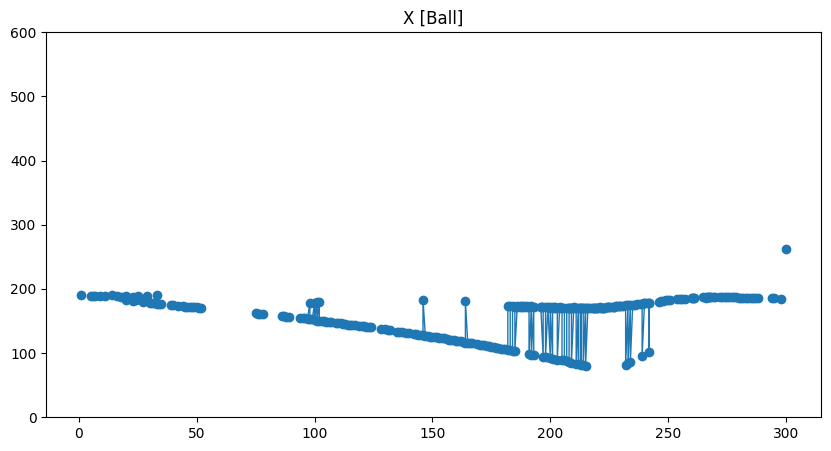

Text(0.5, 1.0, 'Y [Body]')

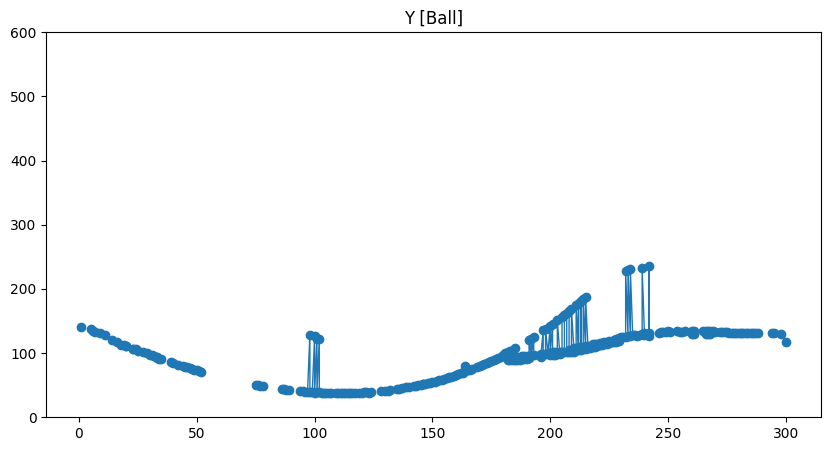

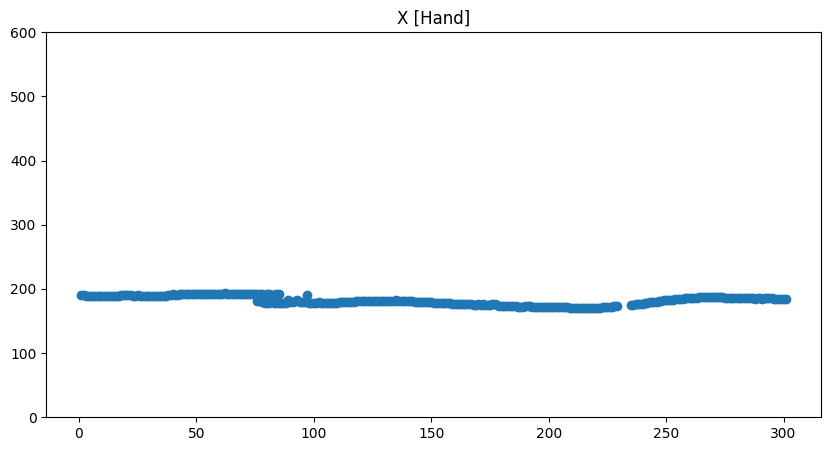

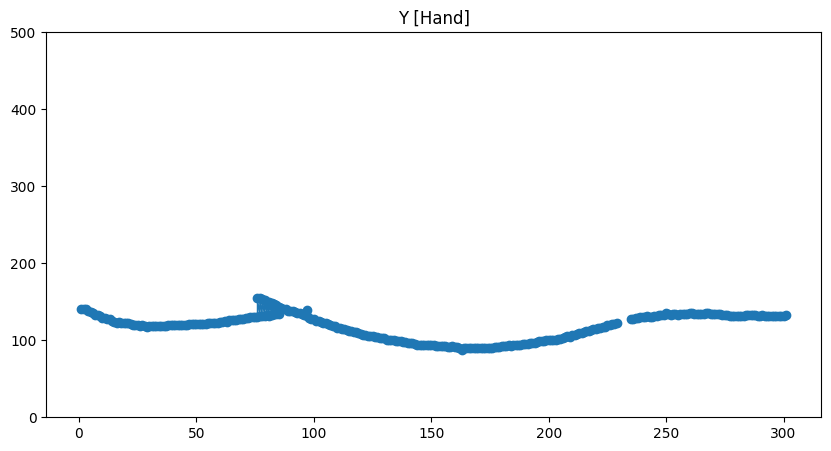

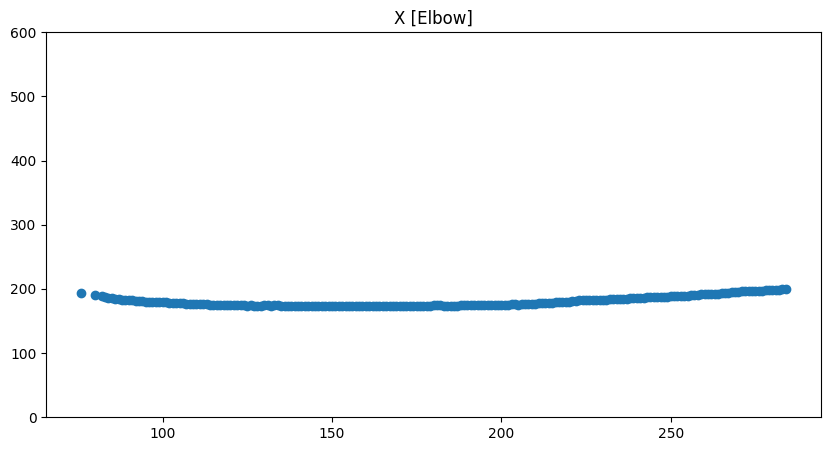

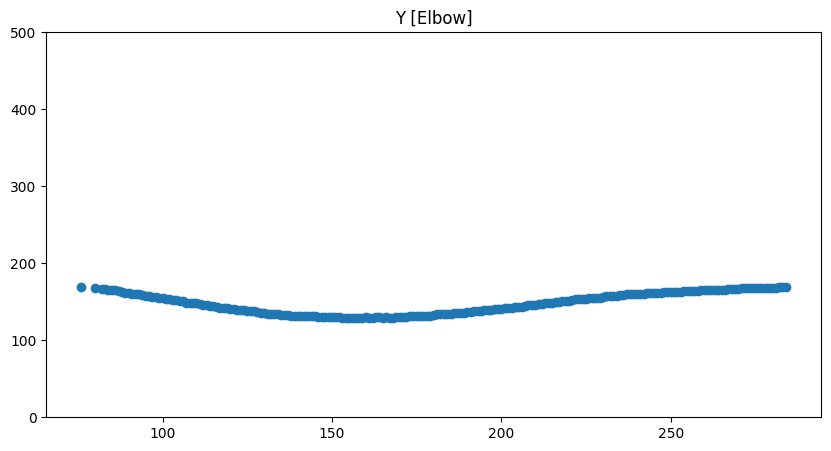

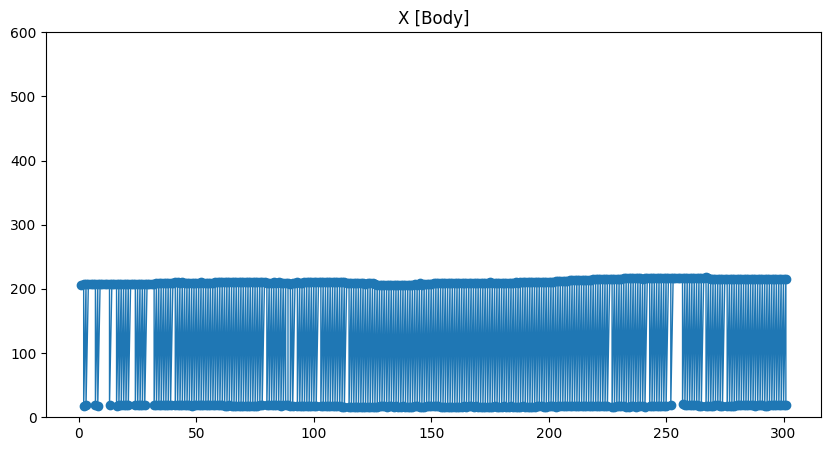

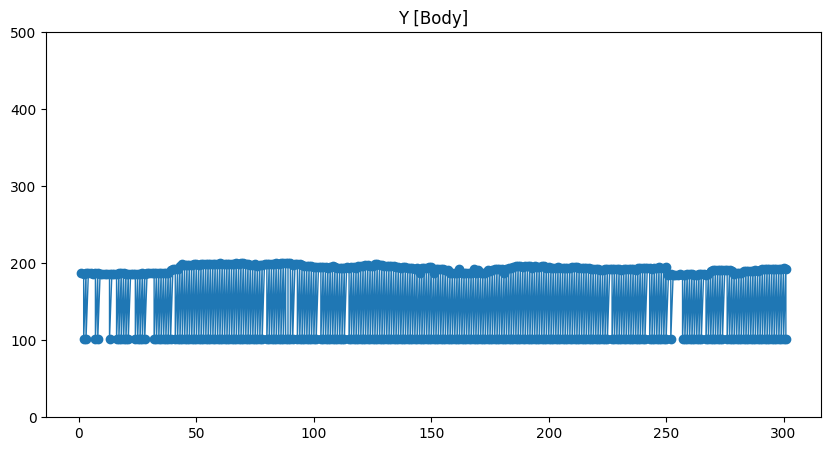

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(frame_0,Ball[:,0],linewidth= 1,marker='o')
plt.ylim(0,600)
plt.title('X [Ball]')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(frame_0,Ball[:,1],linewidth=1,marker='o')
plt.ylim(0,600)
plt.title('Y [Ball]')
plt.subplots(figsize=(10,5))
plt.plot(frame_1,Hand[:,0],linewidth= 1,marker='o')
plt.ylim(0,600)
plt.title('X [Hand]')
plt.figure(figsize=(10,5))
plt.plot(frame_1,Hand[:,1],linewidth= 1,marker='o')
plt.ylim(0,500)
plt.title('Y [Hand]')
plt.figure(figsize=(10,5))
plt.plot(frame_2,Elbow[:,0],linewidth= 1,marker='o')
plt.ylim(0,600)
plt.title('X [Elbow]')
plt.figure(figsize=(10,5))
plt.plot(frame_2,Elbow[:,1],linewidth= 1,marker='o')
plt.ylim(0,500)
plt.title('Y [Elbow]')
plt.figure(figsize=(10,5))
plt.plot(frame_3,Body[:,0],linewidth= 1,marker='o')
plt.ylim(0,600)
plt.title('X [Body]')
plt.figure(figsize=(10,5))
plt.plot(frame_3,Body[:,1],linewidth= 1,marker='o')
plt.ylim(0,500)
plt.title('Y [Body]')